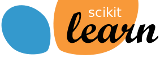

# Python II Day 2 - Scikit-Learn

This afternoon we will be working with *scikit-learn*, which is a framework providing a simple consistent way of using various data mining / machine learning algorithms. It's a great place to start when you have more advanced data visualization needs than a simple plot, or want to create classification or regression models on your data.

This session *isn't* a general machine learning primer - we're going to go quite quickly through practical examples that are generally useful rather than dwell on the theory, or dive into deep learning etc. There are other BICF Machine learning nanocourses that you are encouraged to take if you are interested in machine learning.

Documentation for scikit-learn can be found on the website below. You'll need to refer to it for some of the exercises:

https://scikit-learn.org/stable

## Show me the Data!

We'll use 2 datasets this afternoon, 1 simple image dataset, and 1 real-world gene-expression dataset. Let's take a look at them before we go further.

### Handwritten Digit Images

The digits dataset is a set of images of handwritten digits, as small grayscale images. It's directly accessible through scikit-learn:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()

# There are 1797 images (samples), each of 64 pixels (dimension)
print(digits.data.shape)

(1797, 64)


In [10]:
# The digits dataset holds information under specific names:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


The images can be accessed as `digits.images` - which is a list of all the images. Let's plot the first image:

In [11]:
import matplotlib.pyplot as plt
plt.gray()
plt.axis('off')
plt.imshow(digits.images[0])
plt.show()

<Figure size 640x480 with 1 Axes>

You can take it on trust that this is a `0`, or we can check the *target* for this image:

In [12]:
# The names of the targets are...
print("Target names: {0}".format(digits.target_names))
# The value of the target for the first image is:
print("Value of target for first image: {0}".format(digits.target[0]))
print("Name of target for first image: {0}".format(digits.target_names[digits.target[0]]))

Target names: [0 1 2 3 4 5 6 7 8 9]
Value of target for first image: 0
Name of target for first image: 0


If we want to work with a 1-D representation of the value of each pixel, instead of a 2-D image, we can look in `digits.data`:

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

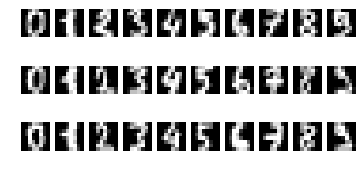

In [14]:
# Some more examples so we can see what they look like:
for index, image in enumerate(digits.images[:30]):
    plt.subplot(4, 10, index +1 )
    plt.axis('off')
    plt.imshow(image)


### BC-TCGA Dataset

Our numeric dataset is of gene expression in breast cancer and normal sample.

Taken from: https://data.mendeley.com/datasets/v3cc2p38hb/1

BC-TCGA consists of 17,814 genes and 590 samples (including 61 normal tissue samples and 529 breast cancer

Let's load it in using Pandas

In [15]:
import pandas as pd
bc_df = pd.read_csv('BC-TCGA_prepared.csv', index_col=0)
bc_df.shape

(590, 17815)

We have a dataset with 590 samples and 17,815 gene expression values per sample. We can take a peak at the data using the `head()` method.

In [16]:
bc_df.head()

CLASS     ELMO2  CREB3L1     RPS11    PNMA1  \
TCGA-AO-A03P-01A-11R-A00Z-07    1.0  1.219417 -0.15225  2.193375 -0.21875   
TCGA-A8-A06T-01A-11R-A00Z-07    1.0  0.430333  0.44450 -0.100625 -0.16750   
TCGA-A8-A07F-01A-11R-A00Z-07    1.0  0.439833  1.88225  0.055625 -0.02600   
TCGA-A8-A081-01A-11R-A00Z-07    1.0  1.242667  1.78100  0.269500  0.14975   
TCGA-A8-A08C-01A-11R-A00Z-07    1.0 -0.228333  0.53350  0.722375  0.42750   

                                  MMP2  C10orf90      ZHX3    ERCC5     GPR98  \
TCGA-AO-A03P-01A-11R-A00Z-07 -0.148667  -1.95500  0.210833  0.42975 -0.970875   
TCGA-A8-A06T-01A-11R-A00Z-07 -0.206000  -2.01850  0.142500 -0.90075 -2.210625   
TCGA-A8-A07F-01A-11R-A00Z-07  0.970167  -3.25750 -0.194333 -0.73925 -0.200375   
TCGA-A8-A081-01A-11R-A00Z-07 -1.073167  -2.74075  0.379667 -0.23675 -1.778500   
TCGA-A8-A08C-01A-11R-A00Z-07 -0.283667  -1.84800 -0.554000  0.09875 -1.851000   

                              ...   SLC2A11    GRIP2     GPLD1   RAB8A  \
TCGA-AO-A03P-01A-11R-A00Z-07  ... -0.212333 -0.33500 -1.328000 -0.0455   
TCGA-A8-A06T-01A-11R-A00Z-07  ...  0.009333  0.23275 -1.152167 -0.0916   
TCGA-A8-A07F-01A-11R-A00Z-07  ...  0.476167 -0.65425 -1.312500 -0.1634   
TCGA-A8-A081-01A-11R-A00Z-07  ...  0.231333 -0.10100  0.157833  0.5051   
TCGA-A8-A08C-01A-11R-A00Z-07  ...  1.157833 -0.49950  0.043833 -0.7107   

                               RXFP2  PIK3IP1  SLC39A6  SNRPD2    AQP7    CTSC  
TCGA-AO-A03P-01A-11R-A00Z-07  1.2465  1.68925   2.3849 -0.3681 -0.2500 -1.2010  
TCGA-A8-A06T-01A-11R-A00Z-07  1.0970  2.41500   1.9061  0.0628 -0.5125 -0.7830  
TCGA-A8-A07F-01A-11R-A00Z-07 -0.7200  2.02300  -0.0164  0.0586 -1.0520 -0.1376  
TCGA-A8-A081-01A-11R-A00Z-07  0.8155  2.98450   0.2366  0.4729 -1.7740  0.9057  
TCGA-A8-A08C-01A-11R-A00Z-07  0.3055  1.50475  -0.0900 -0.1396 -0.2945 -1.2060  

[5 rows x 17815 columns]

Each row is a sample. We have a column 'CLASS' that is '1' for tumour '0' for normal, and then a column for the expression value of each gene.

One small problem is that the data contains some missing/NA values. Let's handle this in a simple manner by dropping the columns (genes) without full, valid data:

In [20]:
bc_df = bc_df.dropna(axis='columns')
bc_df.shape

(590, 17281)

## What should we do with the data?

A common workflow with data that fits into categories (like our digits, or cancer +ve/-ve) is to:

 - Visualize the data
 - Find important features
 - Construct a classifier, that we could use to predict the category of data we obtain in the future.
 
We will work through these steps using some of the algorithms provided by sckit-learn.


## Visualization / Dimensionality Reduction

We've already looked at the digits data as images. These are recognisable to our eyes and brains, but to a computer each image is a set of 64 numbers - representing the intensity of each pixel in the image. This means we have a dataset with 64 dimensions, but we can only sensibly visualize a dataset at 2 or 3 dimensions.

Dimensionality reduction techniques are commonly used to take high-dimensional data and project it into 2 or 3 dimension so that we can plot the result and visualize potential relationships / separation between classes. The algorithms fall into 2 basic classes:

  - Linear (we will look at PCA)
  - Non-linear (we will look at 2 manifold learning techniques)
  
  
Linear dimensionality reduction methods, such as PCA, are the most commonly seen applied to biological data . They work well with a lot of data, but cannot always represent the logical separation of categories of data. Consider a 3D swiss-roll (spiral), with different types of data spread along the spiral:
  
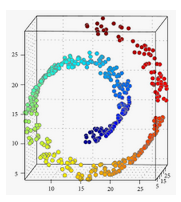

The data flows along the path of the spiral - the red points and turquoise points are far away from eachother along this spiral. However, if we use a linear method that can't take into account that the data has this spiral structure we see them as being close together.

Keeping this in mind, let's look start looking at our datasets with scikit-learn.


### PCA

PCA is a good first step in exploring data. Let's work with the digits image data (64 dimensions) and project it to 2 dimensions with PCA, and make a plot over the 2 principal components.

In [21]:
# Tell Jupyter to show plots without needing to plt.show()
%matplotlib inline
# We are going to use seaborn and pandas as in previous sessions
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# PCA is in the 'decomposition' module of sklearn
from sklearn import decomposition

# Convention says matrix X contains our data, and vector y our categories
X = digits.data
y = digits.target

# To run PCA we first create a PCA object, telling it we want 2 components
pca = decomposition.PCA(n_components=2)
# Now we .fit the PCA to our data
pca.fit(X)
# Now we can get the position of our data in the PCA space with .transform
X_pca = pca.transform(X)

# Convert it into a pandas dataframe with nice column labels, and add the target categories
X_pca_df = pd.DataFrame(data=X_pca, columns= ['PC1', 'PC2'])
X_pca_df['Target'] = y

# A simple scatter plot... we don't want seaborn to fit regression lines
sns.lmplot(x="PC1", y="PC2", data=X_pca_df, hue='Target', fit_reg=False)

Hmmm - we can sort of see the different digits separated in the 2 dimensions, but some of the classes overlap a lot. Maybe linear techniques aren't enough.


### Manifold Learning

Non-linear dimensionality reduction can be performed using manifold learning. This assumes that our data sits on a manifold within space (the swiss roll data sits along a spiral manifold). If we can learn the shape of the manifold then we'd be able to consider where each point sits on the manifold - and project the data down into fewer dimensions based on this should give more relevant output.


### MDS

Multidimensional scaling is a relatively simple form of manifold learning, closely related to PCA. Instead of working directly with the data in the input space, it works on the pairwise distances between points. Let's try it out...


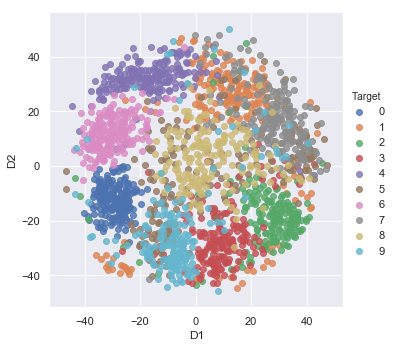

In [22]:
# The techniques we are going to try are in the sklearn manifold module
from sklearn import manifold

X = digits.data
y = digits.target

# We'll fit to 2 components, for a 2D plot
m = manifold.MDS(n_components=2)
# This time we will fit and transform our data in 1 step
X_mds = m.fit_transform(X)

# Into a dataframe, and another simple plot...
X_mds_df = pd.DataFrame(data=X_mds, columns= ['D1', 'D2'])
X_mds_df['Target'] = y
sns.lmplot(x="D1", y="D2", data=X_mds_df, hue='Target', fit_reg=False)

First of all we see that MDS is slow - the plot takes a while to come out. We have ~1700 pieces of data here with 64 dimensions. However, in MDS we aren't working on those 64 dimensions (1700 x 64), but the distances between each pair (1700 x 1700) of data points. That's a much bigger space to consider!

At first glance the plot is a bit similar to PCA - but look closely and it's clear that the different digits are clustered together more tightly, and there's less overlap. The digits 1, 8, and 5 aren't so clearly separated - but other things are much more than in the PCA example.


### TSNE

t-SNE is a fairly recent method which is very sensitive to local structures in data, rather than finding a single manifold (like the spiral in the swiss-roll figure), and unfolding the data along that. Let's try it out on the same digits data.


In [23]:
X = digits.data
y = digits.target

m = manifold.TSNE(n_components=2)
X_tsne = m.fit_transform(X)

X_tsne_df = pd.DataFrame(data=X_tsne, columns= ['D1', 'D2'])
X_tsne_df['Target'] = y

sns.lmplot(x="D1", y="D2", data=X_tsne_df, hue='Target', fit_reg=False)

Awesome! - the method that t-SNE use to project our data down to 2 dimensions results in clearly separated clusters of points for the 9 digits. There is some scatter. If we look at the points for the digit '1' we can see 3 different clusters. Do people write the number 1 in different ways...?



----

## Exercise A

**Work in the notebook 'pythonII-sklearn-exerciseA'**

Try to answer these questions, using the example code above, your expert plotting knowledge, and by referring to the documentation at: https://scikit-learn.org/stable/. Ask a TA for help if you get stuck!

  A1. If we use 3 components for our PCA (and 3D plot the results accordingly) is the separation of digits better?
  
  A2. Is the *Isomap* method better than MDS for a 2D projection? (hint - Isomap considers *n* neighbors of each point, you will need to try different n.
  
  A3. Run a 2D PCA on the BC-TCGA dataset and plot. What does the plot tell you about the difficulty (or not) of classifying the samples as tumour or normal?
  
**Hints**

Our `bc_df` dataframe holds the class labels and the features together. Scikit learn expects a separate feature matrix and label vector. You can extract them like this...

```
bc_y = bc_df['CLASS'].values
bc_X = bc_df.drop(columns=['CLASS']).values
``` 
  
*Bonus Points* - Perform a PCA with *10* components, and make a plot showing the *explained_variance* of each principal component. How many principal components must be used to explain at least 80% of the variance?

----

## Classification

Okay - time to move on.... we've looked at the data, and with non-linear t-SNE we can clearly separate different digits even when we project the data down to 2 dimensions. This should give us confidence that a classification model could be used to predict the number that is written from the image data.


### Logistic Regression

Logistic regression is a simple technique, and a great place to start when trying to perform classification. As with PCA vs t-SNE, jumping from logistic regression to a complex algorithm (say an MLP neural network) is simple in scikit-learn. You will always create an instance of your model, fit it, and then test it / make predictions via similar code. However, complex models take more training time and are often more likely to over-fit to data - giving a false sense of success - if you don't understand how to use them well.

#### Training and testing

We have a dataset of ~1700 images, and want to both fit and assess a model. We need to split our dataset into separate sets used for training and testing. If we test the model using data it was trained on then we aren't really measuring how well it will classify new data (the generalization performance of the model).

Scikit-learn allows us to easily create training and test data splits, with a specified proportion of our original data used for training:

In [24]:
from sklearn.model_selection import train_test_split

X = digits.data
y = digits.target
# Take 40% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

print("Training size: {0}, Testing size: {1}".format(len(y_train), len(y_test)))

Training size: 1078, Testing size: 719


Okay - let's fit our logistic regression model now. We are specifying 2 options here:

  - `multi_class=multinomial` - we have multiple classes, so we need to setup a model that can handle this.
  - `solver=newton-cg` - choose a solver to optimize the model that supports multinomial problems. This is a Newton Conjugate-gradient method.

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and fit our logistic regression model
clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf.fit(X_train, y_train)

# Calculate the accuracy of the model on the training and testing (unseen) data
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Training accuracy: {0}".format(train_score))
print("Testing accuracy: {0}".format(test_score))


Training accuracy: 1.0
Testing accuracy: 0.972183588317107


So - our simple logistic regression model fit perfectly to the training data. When asked to predict the digits depicted by the test images it was nearly accurate. Seems pretty good to me!

We can get some information about how well it did for *each* class by looking at a confusion matrix plot. This shows, for each pairing of actual and predicted class, how many outputs there were from the model on the test data.

[Text(30.5, 0.5, 'Actual'), Text(0.5, 12.5, 'Predicted')]

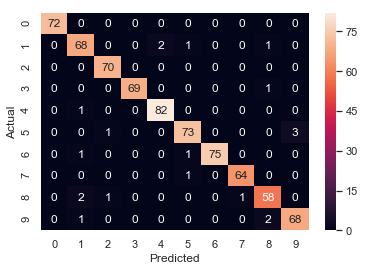

In [26]:
from sklearn.metrics import confusion_matrix

# Ask our model to predict the digits in the test data set
y_pred = clf.predict(X_test)
# Create a confusion matrix from the predictions
cm = confusion_matrix(y_test, y_pred)

# A seaborn heatmap, with each cell annotated, is an excellent way to look at this...
ax = sns.heatmap(cm, annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.set(xlabel="Predicted", ylabel="Actual")

Most of the predictions are on the diagonal here, which shows the model got most things right!

The most common mis-predictions (3 each) are an 8 predicted as a 1, and a 2 predicted as a 1. Maybe we can take a look at the images we got wrong?

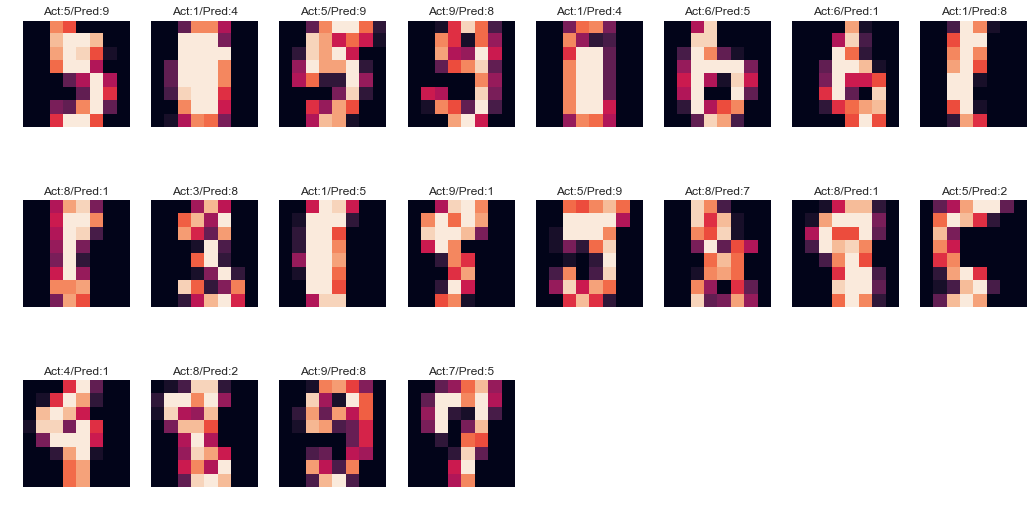

In [27]:
index = 0
plt.figure(figsize=(18, 16))
for img, prediction, label in zip(X_test, y_pred, y_test):
  if prediction != label:
    index = index + 1
    plt.subplot(5,8, index)
    plt.axis('off')
    plt.margins(0.5)
    plt.imshow(img.reshape((8, 8)))
    plt.title('Act:{0}/Pred:{1}'.format(label, prediction)) 

### Support Vector Machine (RBF)

We did pretty well, but maybe some of the incorrect predictions above could be found by a more sophisticated model?

The Support Vector Machine is a linear classifier that can be modified to solve non-linear problems using the 'kernel-trick'. A nonlinear kernel function is employed so the classifier works on values from these non-linear kernels rather than the original features. We will use a Radial Basis Function (RBF) kernel.

Training accuracy: 0.9990723562152134
Testing accuracy: 0.9874826147426982


[Text(30.5, 0.5, 'Actual'), Text(0.5, 12.5, 'Predicted')]

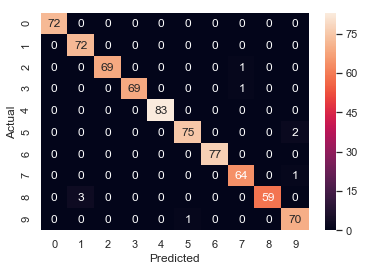

In [28]:
from sklearn import svm

# Fit an SVM. Specifying the 'gamma' parameter will mean this is an SVM
# using RBF kernels.
clf = svm.SVC(gamma=0.001).fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print("Training accuracy: {0}".format(train_score))
print("Testing accuracy: {0}".format(test_score))

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.set(xlabel="Predicted", ylabel="Actual")

Our SVM classifier is slightly better overall on the test set - with nearly 97% accuracy. The added complexity of the model is probably not worth it for the return in this case.

We can see the decisions are being made differently, as the incorrect predictions are different. This new model is mostly failing to predict real number '3' images, confusing them with 5,7,8.

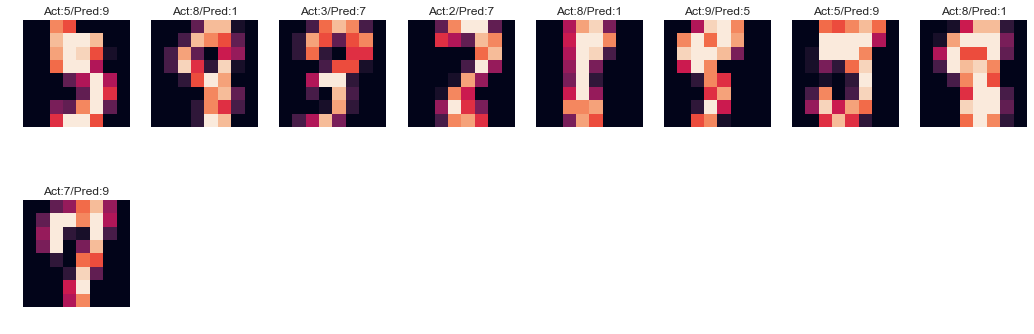

In [29]:
index = 0
plt.figure(figsize=(18, 16))
for img, prediction, label in zip(X_test, y_pred, y_test):
  if prediction != label:
    index = index + 1
    plt.subplot(5,8, index)
    plt.axis('off')
    plt.margins(0.5)
    plt.imshow(img.reshape((8, 8)))
    plt.title('Act:{0}/Pred:{1}'.format(label, prediction)) 

----
## Exercise B

**Work in the notebook 'pythonII-sklearn-exerciseB'**

Let's go back to the BC-TCGA dataset and try to create a classifier for it.

There's a catch... the >17,000 Gene expression values are a *huge* number of features to consider in a model. We have far fewer samples than features, which is usually a bad thing. We need to either:

  * Use dimensionality reduction (like PCA) to give us a smaller number of features to train our model
  
  * Use a feature selection procedure to pick a subset of the best features.

A simple feature selection is to pick the K best features according to some criterion. We could use the *mutual information* measure here:

```
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X_new = SelectKBest(mutual_info_classif, k=100).fit_transform(X, y)
```

B1. Use the SelectKBest method above on the BC-TCGA dataset to get a dataset with the 100 'best' genes

B2. Visualize the data with PCA. How does it compare to PCA over the compete set of genes?

B3. Create and evaluate a logicstic regression classifier on the set of 100 best genes.
  
**Bonus points** - Use your Pandas knowledge to find the names of the genes that were selected by the feature selection procedure.
